# SIMULATIONS TO ASSESS THE AUTOCORRELATION PROPERTIES OF THE URNINGS

## Importing necessary packages and the class definition script of the Urnings model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#importing the urnings algortihm
import main_urnings as mu

## Urnings 2 autocorrelation with one student (pi = 0.5)

### Setting up the simulation

Urn size = 10, starting value = 5, true value = 0.5, number of item = 50

In [27]:
#game settings
n_player = 1
n_items = 50
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 100

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items

player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = starting_score * 10, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


### Setting up the game environment

No adaptivity, Urnings 2 algorithm, number of games = 10000

In [28]:
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = [player], items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=10000)

In [32]:
print("The estimated value of the player is: ", np.mean(player.container / player_urn_sizes), "while the true value is: ", 0.5)

The estimated value of the player is:  0.4533146685331467 while the true value is:  0.5


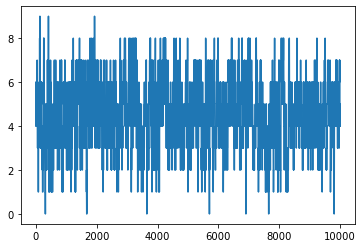

In [30]:
plt.plot(player.container)
plt.show()

### Calculating autocorrelation for the student

Calculating up to lag 30 autocorrelation, for the number of green balls in the student's urn (using statsmodels built in acf function).

/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


[1.         0.91801693 0.84327526 0.77564006 0.71423576 0.65537418
 0.60294441 0.55465259 0.51312841 0.47020992 0.43066476 0.39593221
 0.36389831 0.33517177 0.30835528 0.28655529 0.26590075 0.24801382
 0.23183604 0.21952634 0.20597826 0.19353362 0.18023442 0.16965486
 0.16026871 0.14921838 0.13612008 0.12569944 0.11759366 0.11092717
 0.10554104]


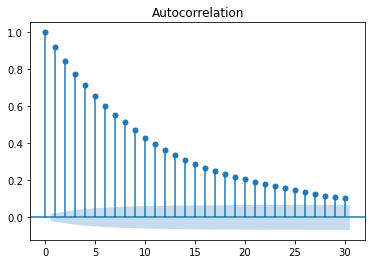

In [33]:
acf = player.autocorrelation(lag = 30, plots=True)

print(acf)

Calculating the autocorrelation of the second order chain (the difference between the subsequent entries in the chain). This will be a random variable Y in {-1, 0, 1}.



/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


[ 1.         -0.04417012 -0.0430727  -0.0381344  -0.01563786 -0.03923185
 -0.02524008 -0.04115229  0.0085048  -0.02057613 -0.02962966 -0.01646096
 -0.02002746 -0.01152266 -0.03045265 -0.00685868 -0.01673517 -0.01042516
 -0.02359388  0.00740746 -0.00658428  0.0052127  -0.0167352  -0.00713298
  0.01015097  0.01234573 -0.01646085 -0.01399174 -0.00877909 -0.00795608
 -0.00548697]


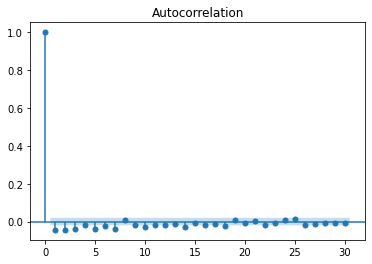

In [34]:
acf_so = player.so_autocorrelation(lag = 30, plots=True)

print(acf_so)

Convergence in probability plot

(array([2436.,    0., 4162.,    0., 2335.,    0.,  903.,    0.,  149.,
          16.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

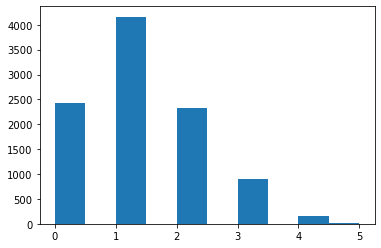

In [36]:
true_vec = np.repeat(player.true_value * player.urn_size, len(player.container))

diff_vec = player.container - true_vec

#convergence in probability
plt.hist(abs(diff_vec))

Convergence in distribution plot

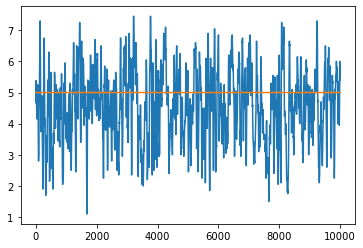

In [39]:
#convergence in distribution
mean_vec = []
for i in range(1, len(player.container)):

    if i < 20:
        window = player.container[0:i]
        mean_vec.append(np.mean(window))
    else:
        window = player.container[(i-20):i]
        mean_vec.append(np.mean(window))

plt.plot(mean_vec)
plt.plot(np.repeat(0.5 * 10, len(mean_vec)))



In [11]:
difference_vec = []

for i in range(1, len(player.container)):

    if i < 20:
        difference_vec.append(0)
    else:
        window = player.container[i] - player.container[i-19]
        difference_vec.append(window)


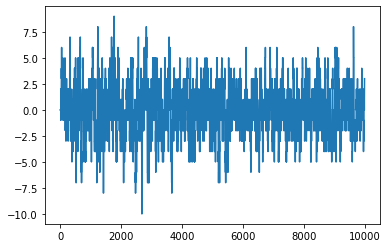

In [14]:
plt.plot(difference_vec)


### Setting up the simulation 2

Urn size = 100, starting value = 50, true value = 0.5, number of item = 50

In [9]:
#game settings
n_player = 1
n_items = 50
starting_score = 50
player_urn_sizes = 100
item_urn_sizes = 100

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items

player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.8)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


### Setting up the game environment 2

No adaptivity, Urnings 2 algorithm, number of games = 10000

In [10]:
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = [player], items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=10000)

The estimated value of the player is:  0.48911308869113096 while the true value is:  0.5


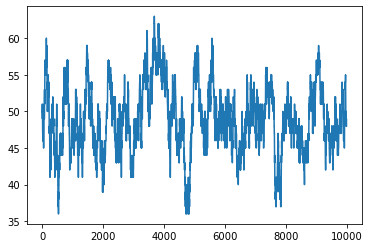

In [47]:
print("The estimated value of the player is: ", np.mean(player.container / player_urn_sizes), "while the true value is: ", 0.8)

plt.plot(player.container)

### Autocorrelation up to 30 lag

[1.         0.99022675 0.98073677 0.97163854 0.96245673 0.95344568
 0.94464986 0.9357073  0.92698528 0.9184149  0.91011356 0.90173971
 0.89350728 0.88531441 0.8772834  0.86950099 0.86176706 0.85394551
 0.84620756 0.83855276 0.83118743 0.82378785 0.81669155 0.80968286
 0.80237623 0.79519188 0.788237   0.78129146 0.77451181 0.76785846
 0.76124914]


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


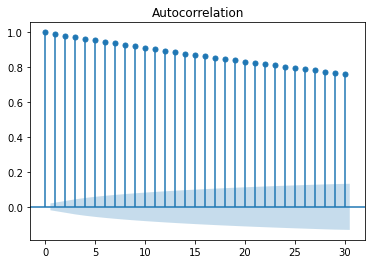

In [48]:
acf2 = player.autocorrelation(lag = 30, plots=True)

print(acf2)

/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00, -1.47722599e-02, -1.97798217e-02,  4.00590924e-03,
       -8.51287019e-03, -1.10166261e-02,  7.51116745e-03, -1.10166261e-02,
       -7.76169339e-03, -1.37707075e-02,  3.75553359e-03, -7.51131783e-03,
       -1.75272938e-03, -8.01206903e-03, -1.27691051e-02, -2.25333038e-03,
        4.75718609e-03, -4.00590944e-03, -4.25623497e-03, -1.47720598e-02,
        1.75277913e-03, -1.55231365e-02, -4.75698619e-03,  1.55233864e-02,
       -6.25923974e-03, -1.15170770e-02, -2.50125498e-04, -8.26209427e-03,
       -6.50941509e-03, -2.25308017e-03,  1.40213831e-02])

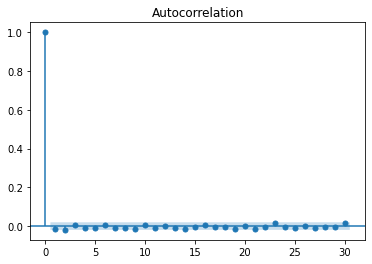

In [49]:
acf_so_2 = player.so_autocorrelation(lag = 30, plots=True)

acf_so_2

### Setting up simulation 3 

In [50]:
#game settings
n_player = 1
n_items = 50
starting_score = 500
player_urn_sizes = 1000
item_urn_sizes = 100

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items

player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = starting_score / 10, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


In [51]:
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = [player], items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=10000)

The estimated value of the player is:  0.5548531146885312 while the true value is:  0.5


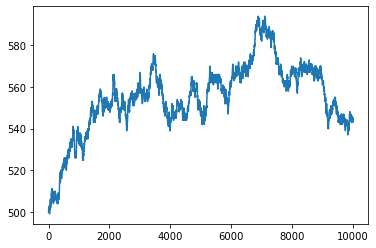

In [53]:
print("The estimated value of the player is: ", np.mean(player.container / player_urn_sizes), "while the true value is: ", 0.5)

plt.plot(player.container)

## Urnings 2 with multiple students

### Setting up the simulation

In [60]:
#game settings
n_player = 10
n_items = 50
starting_score = 50
player_urn_sizes = 100
item_urn_sizes = 100

#true scores for players and items
player_true_scores = np.append(np.array([0.5]), np.random.normal(0, 1, n_player - 1))
item_true_scores = np.random.uniform(0, 1, n_items)
player_true_scores = np.exp(player_true_scores) / (1 + np.exp(player_true_scores)) 

#creating players and items
players = []
items = []
for i in range(n_player):
    pname = "player" + str(i)
    
    player = mu.Player(user_id = pname, score = starting_score, urn_size = player_urn_sizes, true_value = player_true_scores[i])
    players.append(player)

for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = int(np.round(item_true_scores[i] * item_urn_sizes)), urn_size = item_urn_sizes, true_value = item_true_scores[i])
    items.append(item)


### Setting up game environment

In [61]:
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=100000)

/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


[1.         0.99133336 0.98280355 0.97417924 0.96561704 0.95702997
 0.94829117 0.93957977 0.93082859 0.92218682 0.91358737 0.90543796
 0.89737806 0.88948726 0.88154672 0.87368078 0.86588701 0.85798372
 0.84999842 0.84213248 0.83428146 0.8265771  0.8193179  0.81208855
 0.80501833 0.79815203 0.79130815 0.78435984 0.77754084 0.77059253
 0.76366411]
The estimated value of the player is:  [0.63] While the true value is:  0.6224593312018546


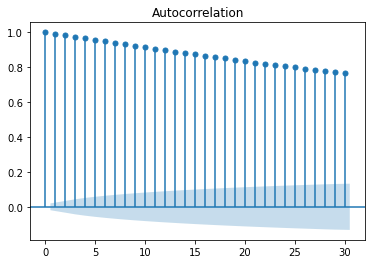

In [62]:
acf_2 = players[0].autocorrelation(lag = 30, plots=True)

print(acf_2)

print("The estimated value of the player is: ", players[0].est, "While the true value is: ", player_true_scores[0])


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


[ 1.00000000e+00 -7.76355889e-03  5.66533535e-03 -3.03062813e-04
  1.48784277e-03  8.64953268e-03 -5.07778245e-03  2.38232734e-03
 -6.57026965e-03 -5.97343038e-03 -2.74604360e-02 -5.37736519e-03
 -1.01520838e-02  2.97839053e-03 -4.48210705e-03 -7.76472626e-03
  9.54285288e-03  5.36574759e-03 -7.16788800e-03 -9.01070957e-04
 -9.25721497e-03 -2.62667620e-02 -1.79633211e-03 -9.55524957e-03
 -8.36118375e-03 -4.77975887e-03  6.26138951e-03 -7.76434549e-03
  7.75348793e-03 -1.19910907e-03 -1.22402585e-02]


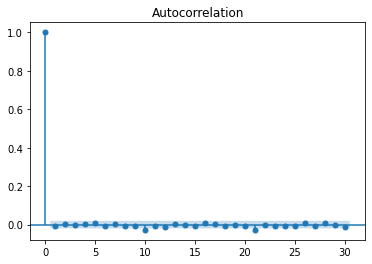

In [63]:
acf_2_so = players[0].so_autocorrelation(lag = 30, plots = True)

print(acf_2_so)


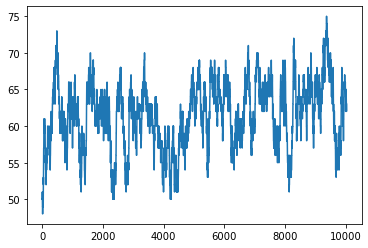

In [64]:
plt.plot(players[0].container)
plt.show()

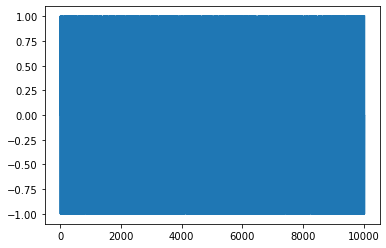

In [65]:
plt.plot(players[0].differential_container)
plt.show()

## Simulation with adaptive version

In [66]:
#game settings
n_player = 1
n_items = 50
starting_score = 50
player_urn_sizes = 100
item_urn_sizes = 100

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items

player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


In [67]:
adaptive_rule = mu.Game_Type(adaptivity="adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = [player], items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=10000)

The estimated value of the player is:  0.6148873379860419 While the true value is:  0.6224593312018546


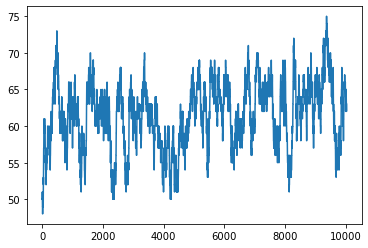

In [71]:
print("The estimated value of the player is: ", np.mean(players[0].container / 100), "While the true value is: ", player_true_scores[0])

plt.plot(players[0].container)

[1.         0.99133336 0.98280355 0.97417924 0.96561704 0.95702997
 0.94829117 0.93957977 0.93082859 0.92218682 0.91358737 0.90543796
 0.89737806 0.88948726 0.88154672 0.87368078 0.86588701 0.85798372
 0.84999842 0.84213248 0.83428146 0.8265771  0.8193179  0.81208855
 0.80501833 0.79815203 0.79130815 0.78435984 0.77754084 0.77059253
 0.76366411]


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


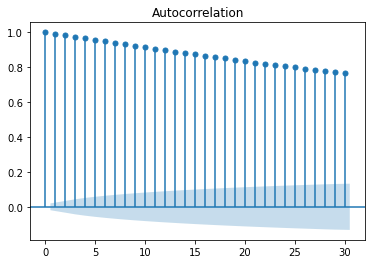

In [72]:
acf_adaptive = players[0].autocorrelation(lag = 30, plots = True)
print(acf_adaptive)

[ 1.00000000e+00 -7.76355889e-03  5.66533535e-03 -3.03062813e-04
  1.48784277e-03  8.64953268e-03 -5.07778245e-03  2.38232734e-03
 -6.57026965e-03 -5.97343038e-03 -2.74604360e-02 -5.37736519e-03
 -1.01520838e-02  2.97839053e-03 -4.48210705e-03 -7.76472626e-03
  9.54285288e-03  5.36574759e-03 -7.16788800e-03 -9.01070957e-04
 -9.25721497e-03 -2.62667620e-02 -1.79633211e-03 -9.55524957e-03
 -8.36118375e-03 -4.77975887e-03  6.26138951e-03 -7.76434549e-03
  7.75348793e-03 -1.19910907e-03 -1.22402585e-02]


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


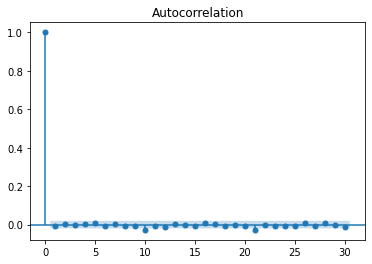

In [73]:
acf_adaptive_so = players[0].so_autocorrelation(lag = 30, plots = True)
print(acf_adaptive_so)

In [6]:
#generate an update and check the correlations
stage1 = np.random.binomial(10000, 0.5)

item_difficulties = np.random.uniform(0,1,10000)



array([0.25968176, 0.69586967, 0.49418564, ..., 0.34874094, 0.91989602,
       0.26184269])